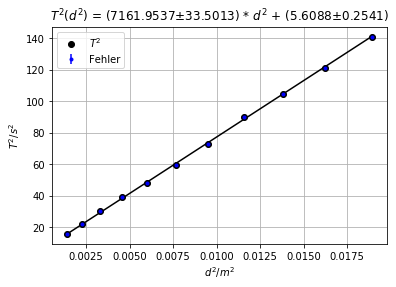

G: 2026593644.9998047
(9, 2.0265936449998048)
0.0005551632427265805
theta_x_mess :9.003611791205953e-05
theta_x_theo :7.315456628125003e-05
1.2307655214017221
dG:337915934.2329844
0.0005551632427265805
dD:0.0009212651735120034
theta_x_mess :9.003611791205953e-05 ; dtheta_x_mess :5.4570981252745935e-05
theta_x_theo :7.315456628125003e-05 ; dtheta_x_theo :5.525967760154216e-05
1.2307655214017221


In [3]:
#Braucht man halt, ne?
from scipy import stats
import math
import numpy as np
from matplotlib import pyplot as plt
from lmfit import report_fit
from lmfit.models import LinearModel
def split(value):
    exp=int(math.log10(value))
    man=value/10**exp
    return exp, man
#Reg's machen
def fit(x,y,err):
    weights=1/err
    model = LinearModel(independent_vars=['x'])
    result=model.fit(data=y,x=x,weights=weights)
    v=[] #values
    s=[] #stderr
    #0:slope 1
    for name, param in result.params.items():
        v.append(param.value)
        if(param.stderr==None):
            s.append(0)
        else:
            s.append(param.stderr)
    return v,s

#zeichnet die gegebenen Messwerte inkl reg's, wird gespeichert falls save=True
def zeichnen (x, y, label, err, speichername, xlabel, ylabel, titel=" ", save=True):
    #Alles für die 1. Werte
    plt.plot(x, y, "ok", label=label)
    plt.errorbar(x, y, yerr=err, color="b", fmt='.', label="Fehler")
    reg = fit(x,y,err)
    plt.plot(x, (reg[0][0]*x+reg[0][1]), color="k")
    #Rest des Plots, also z.B. Achsen usw. 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(("$T^2(d^2)$ = ({:.4f}$\pm${:.4f}) * $d^2$ + ({:.4f}$\pm${:.4f})".format(reg[0][0],reg[1][0],reg[0][1],reg[1][1])))
    plt.grid()
    plt.legend()
    if bool(save) == True:
        plt.savefig(speichername)
    plt.show()
    return (reg)

T0 = np.array([180, 191, 198, 200, 200, 199])/100
T2 = np.array([394, 398, 397, 385, 404, 389])/100
T3 = np.array([461, 494, 468, 458, 455, 467])/100
T4 = np.array([565, 546, 553, 529, 534, 555])/100
T5 = np.array([658, 587, 590, 599, 675, 633])/100
T6 = np.array([703, 704, 725, 699, 646, 682])/100
T7 = np.array([731, 809, 769, 784, 739, 783])/100
T8 = np.array([842, 843, 881, 885, 837, 822])/100
T9 = np.array([926, 915, 953, 961, 962, 982])/100
T10 = np.array([1010, 1041, 1031, 1019, 1019, 1017])/100
T11 = np.array([1085, 1123, 1125, 1078, 1117, 1078])/100
T12 = np.array([1171, 1169, 1123, 1187, 1222, 1250])/100
T_err=np.array([stats.sem(T2),stats.sem(T3),
                stats.sem(T4),stats.sem(T5),stats.sem(T6),
                stats.sem(T7),stats.sem(T8),stats.sem(T9),
                stats.sem(T10),stats.sem(T11), stats.sem(T12)])
T_=np.array([np.mean(T2),np.mean(T3),
            np.mean(T4),np.mean(T5),np.mean(T6),
            np.mean(T7),np.mean(T8),np.mean(T9),
            np.mean(T10),np.mean(T11),np.mean(T12)])
T=T_

Tsq=np.square(T)
#Zylinder
m1 = 0.3546
m2 = 0.3543
m = (m1+m2)/2

dm = 5*10**(-5)
h = 0.035
dh = 5*10**(-5)
ra = 0.04/2
ri = 0.0083/2
dr = dh/2
dR=dr #Vllt im nachhinein hinzugefügt
#Draht
l1 = 0.203
l2 = 0.22
dl = 0.0005
R = 0.6*10**(-3)
#d's
d = np.array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12])+h/2
dsq=np.square(d)

reg = zeichnen (x=dsq, y=Tsq, label="$T^2$", err=T_err, speichername="T^2(d^2)", xlabel="$d^2/m^2$", ylabel="$T^2/s^2$", titel=" ", save=True)

G=((16*math.pi*m)/((reg[0][0])*(R)**4*(1/l1+1/l2)))
print(f"G: {G}")
print(split(G))


theta_mess=(reg[0][1]*G*R**4*(1/l1+1/l2))/(8*math.pi)
print(theta_mess)
D=math.pi*G*(R**4)/(2)*(1/l1+1/l2)
theta_s=(np.mean(T0)**2*D)/(4*math.pi**2)
theta_x_mess=(theta_mess-theta_s)/2
theta_x_theo=m/4*(ra**2+ri**2+((h**2)/3))

print(f"theta_x_mess :{theta_x_mess}")
print(f"theta_x_theo :{theta_x_theo}")
print(theta_x_mess/theta_x_theo)

dG=G*math.sqrt((dm/m)**2+
                (-reg[1][0]/reg[0][0])**2+
                (-4*dR/R)**2+((l2*dl)/(l1*(l1+l2)))**2+
                ((l1*dl)/(l2*(l1+l2)))**2)
print(F"dG:{dG}")


theta_mess=(reg[0][1]*G*R**4*(1/l1+1/l2))/(8*math.pi)
dtheta_mess=theta_mess*math.sqrt((reg[1][0]/reg[0][0])**2+
                                (dG/G)**2+
                                (4*dR/R)**2+
                                (-dl/(l1**2*(1/l1-1/l2)))**2+
                                (-dl/(l2**2*(1/l1-1/l2)))**2)
print(theta_mess)

D=math.pi*G*(R**4)/(2)*(1/l1+1/l2)
dD=D*math.sqrt((dG/G)**2+
               (4*dR/R)**2+
               (-dl/(l1**2*(1/l1+1/l2)))**2+
               (-dl/(l2**2*(1/l1+1/l2)))**2)
print(F"dD:{dD}")





theta_s=(np.mean(T0)**2*D)/(4*math.pi**2)
dtheta_s=theta_s*math.sqrt((2*stats.sem(T0)/np.mean(T0))**2+(dD/D))

theta_x_mess=(theta_mess-theta_s)/2
dtheta_x_mess=theta_x_mess*math.sqrt((dtheta_mess/(theta_mess-dtheta_s))**2+(-dtheta_s/(theta_mess-dtheta_s))**2)

theta_x_theo=m/4*(ra**2+ri**2+((h**2)/3))
dtheta_x_theo=theta_x_theo*math.sqrt((dm/m)**2+
                                    ((2*ra*dr)/(ra**2+h**2/3+ri**2))**2+
                                    ((2*ri*dr)/(ra**2+h**2/3+ri**2))**2+
                                    ((2*h*dh)/(3*(ra**2+h**2/3+ri**2))**2))


dtheta_x_mess
print(f"theta_x_mess :{theta_x_mess} ; dtheta_x_mess :{dtheta_x_mess}")
print(f"theta_x_theo :{theta_x_theo} ; dtheta_x_theo :{dtheta_x_theo}")
print(theta_x_mess/theta_x_theo)